## 2D Burger's Equation (Numerical Solution)

The code simulates the evolution of a fluid's velocities (in both x and y directions) as governed by the 2D Burgers' equation, which describes the combination of convective and diffusive processes in the fluid.

The spatial domain is a 2x2 square (ranging from 0 to 2 in both x and y directions).

- Both velocity components `u` and `v` are initialized to a value of 1 everywhere in the domain.
- A square patch (with edges parallel to the axes) in the middle of the domain is initialized with a higher velocity value of 5. This creates a disturbance in the uniform flow and is the primary feature of interest in the simulation.

The boundaries of the domain (all four edges) are kept at a constant value of 1 for both `u` and `v` throughout the simulation.


The code uses a kinematic viscosity (`nu`) of 0.1. This parameter controls the balance between the convective and diffusive effects in the equation. Higher viscosity will make the diffusion (smearing out) more dominant, while a lower value will emphasize the convection (movement with the fluid flow).

The main objective of this simulation is to observe how the initially disturbed velocity patch (the square in the middle with higher velocities) evolves over time under the combined effects of convection and diffusion. 


### The 2D Burgers' equation in its unsteady, viscous form is:

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} = \nu \left( \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} \right) $$


$$ \frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y} = \nu \left( \frac{\partial^2 v}{\partial x^2} + \frac{\partial^2 v}{\partial y^2} \right) $$

### Discretization:

Represent the discrete points in space and time as:

$ u(i, j, n) $
Where:
- $i$ corresponds to the x-location.
- $j$ corresponds to the y-location.
- $n$ corresponds to the time step.


### Forward Difference for Time Derivative:


$\frac{\partial u}{\partial t} \approx \frac{u(i, j, n+1) - u(i, j, n)}{\Delta t}$

### Backward Difference for First-order Spatial Derivative:

$ \frac{\partial u}{\partial x} \approx \frac{u(i, j, n) - u(i-1, j, n)}{\Delta x} $

$ \frac{\partial u}{\partial y} \approx \frac{u(i, j, n) - u(i, j-1, n)}{\Delta y} $

### Central Difference for Second-order Spatial Derivative:

$ \frac{\partial^2 u}{\partial x^2} \approx \frac{u(i+1, j, n) - 2u(i, j, n) + u(i-1, j, n)}{\Delta x^2} $

$ \frac{\partial^2 u}{\partial y^2} \approx \frac{u(i, j+1, n) - 2u(i, j, n) + u(i, j-1, n)}{\Delta y^2} $

### Substituting these approximations into the 2D Burgers' equation gives:

$$ \frac{u(i, j, n+1) - u(i, j, n)}{\Delta t} + u(i, j, n) \frac{u(i, j, n) - u(i-1, j, n)}{\Delta x} + v(i, j, n) \frac{u(i, j, n) - u(i, j-1, n)}{\Delta y} = \nu \left( \frac{u(i+1, j, n) - 2u(i, j, n) + u(i-1, j, n)}{\Delta x^2} + \frac{u(i, j+1, n) - 2u(i, j, n) + u(i, j-1, n)}{\Delta y^2} \right) $$

From the equation above, you can solve for $ u(i, j, n+1) $, the value at the next time step, in terms of known values.

In [7]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [8]:
nt = 500 # Time steps
nx = 51 # x grid points
ny = 51 # y grid points

nu = 0.1 # Kinematic viscosity
dt = 0.001 # Time step size

In [9]:
# Setting up the spatial and temporal domain:
dx = 2/(nx - 1)
dy = 2/(ny - 1)
x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

In [10]:
# Initial conditions:
u = np.ones((ny, nx))
v = np.ones((ny, nx))

# Store final solution:
uf = np.ones((nt ,ny, nx))
vf = np.ones((nt ,ny, nx))

# The velocity fields u and v are initialized to 1 everywhere. However, a square region in the middle of the domain has higher values (5)
u[int(0.75/dy):int(1.25/dy+1) , int(0.75/dy):int(1.25/dy+1)] = 5
v[int(0.75/dy):int(1.25/dy+1) , int(0.75/dy):int(1.25/dy+1)] = 5

uf[0 ,int(0.75/dy):int(1.25/dy+1) , int(0.75/dy):int(1.25/dy+1)] = 5
vf[0 ,int(0.75/dy):int(1.25/dy+1) , int(0.75/dy):int(1.25/dy+1)] = 5

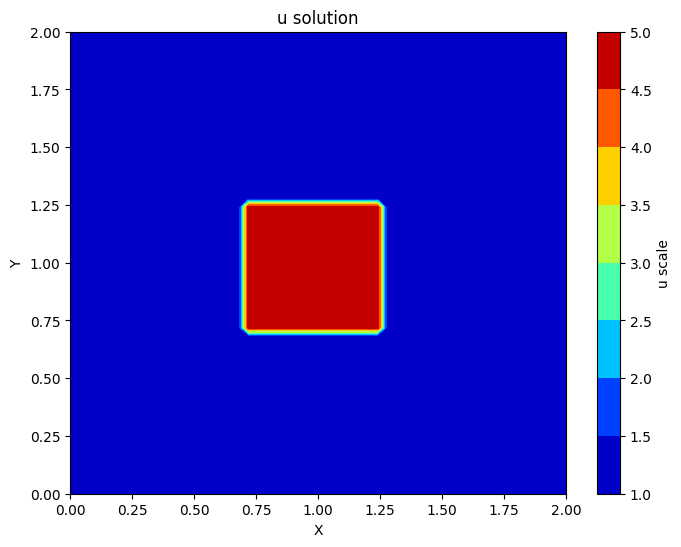

In [11]:
X, Y = np.meshgrid(x,y)

plt.figure(figsize=(8,6))
contour = plt.contourf(X,Y,u[:], cmap='jet')
plt.title("u solution")
plt.xlabel("X")
plt.ylabel("Y")
colorbar = plt.colorbar(contour)
colorbar.set_label("u scale")

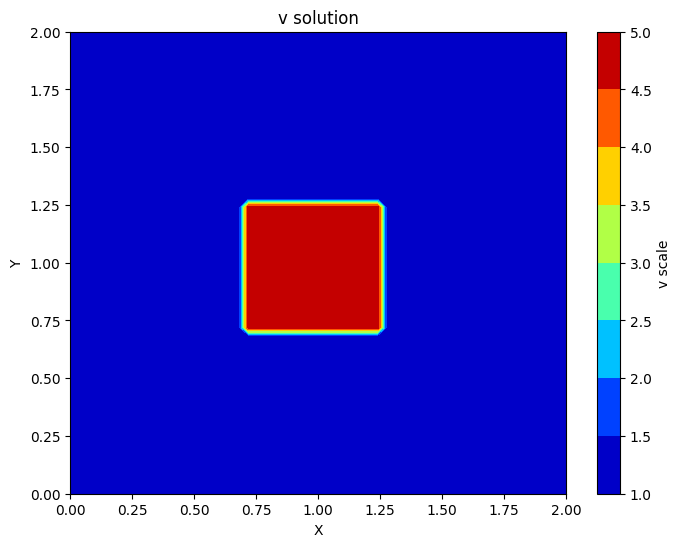

In [12]:
X, Y = np.meshgrid(x,y)

plt.figure(figsize=(8,6))
contour = plt.contourf(X,Y,v[:], cmap='jet')
plt.title("v solution")
plt.xlabel("X")
plt.ylabel("Y")
colorbar = plt.colorbar(contour)
colorbar.set_label("v scale")

In [13]:
for n in range(1, nt):
    un = u.copy()
    vn = v.copy()
    for i in range(1, nx-1):
        for j in range(1, ny-1): 
            u[i, j] = (un[i, j] -(un[i, j] * dt / dx * (un[i, j] - un[i-1, j])) -vn[i, j] * dt / dy * (un[i, j] - un[i, j-1])) + (nu*dt/(dx**2))*(un[i+1,j]-2*un[i,j]+un[i-1,j])+(nu*dt/(dx**2))*(un[i,j-1]-2*un[i,j]+un[i,j+1])
            v[i, j] = (vn[i, j] -(un[i, j] * dt / dx * (vn[i, j] - vn[i-1, j]))- vn[i, j] * dt / dy * (vn[i, j] - vn[i, j-1])) + (nu*dt/(dx**2))*(vn[i+1,j]-2*vn[i,j]+vn[i-1,j])+(nu*dt/(dx**2))*(vn[i,j-1]-2*vn[i,j]+vn[i,j+1])
            uf[n, i, j] = u[i, j]
            vf[n, i, j] = v[i, j]
            
    # The velocity fields are kept at a value of 1 on all the boundaries:
    u[:, 0] = 1
    u[:, -1] = 1
    u[0, :] = 1
    u[-1 ,:] = 1
    v[: ,0] = 1
    v[:, -1] = 1
    v[0, :] = 1
    v[-1, :] = 1        

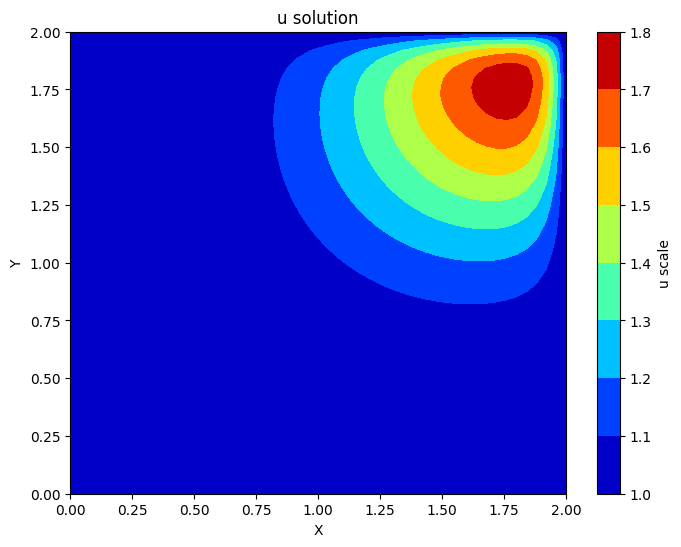

In [14]:
X, Y = np.meshgrid(x,y)

plt.figure(figsize=(8,6))
contour = plt.contourf(X,Y,u[:], cmap='jet')
plt.title("u solution")
plt.xlabel("X")
plt.ylabel("Y")
colorbar = plt.colorbar(contour)
colorbar.set_label("u scale")

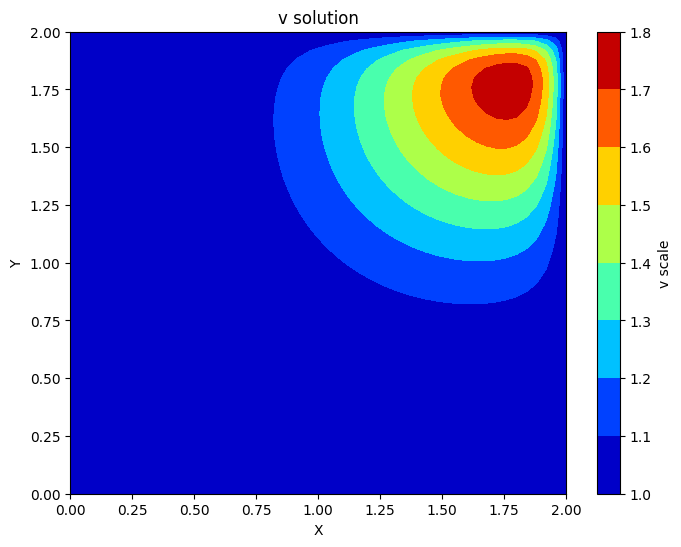

In [15]:
X, Y = np.meshgrid(x,y)

plt.figure(figsize=(8,6))
contour = plt.contourf(X,Y,v[:], cmap='jet')
plt.title("v solution")
plt.xlabel("X")
plt.ylabel("Y")
colorbar = plt.colorbar(contour)
colorbar.set_label("v scale")

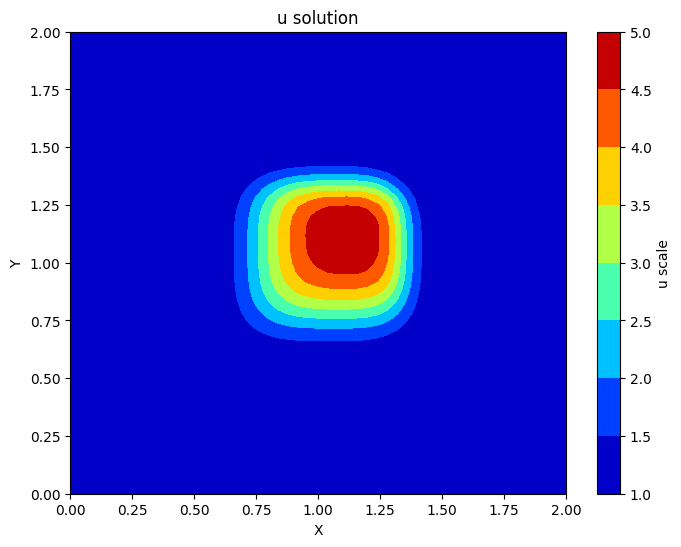

In [16]:
X, Y = np.meshgrid(x,y)

#set the time as you like
u = uf[30,:,:]

plt.figure(figsize=(8,6))
contour = plt.contourf(X,Y,u[:], cmap='jet')
plt.title("u solution")
plt.xlabel("X")
plt.ylabel("Y")
colorbar = plt.colorbar(contour)
colorbar.set_label("u scale")